# Dates in python

As a part of setting up the website for the [Docathon](http://docathon.org) I've had to re-learn all of my date string formatting rules. It's one of those little problems you don't really think about - turning an arbitrary string into something structured like a date - until you've actually got to do it.

There are a bunch of tools in python for using date-like objects, but it's not always easy to figure out how these work. This post is just a couple of pieces of information I've picked up along the process.

## Useful links
Here's a list of useful links I've picked up, which I'll mention below:

* [strftime.org](http://strftime.org/) for remembering how date string formatting works.
* [The pandas datetime docs](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)
* [A list of time zone names](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)
* [ISO 8601](https://www.w3.org/TR/NOTE-datetime) format explanation

# A quick tour of our tools
In this post we'll focus on two main tools for date functionality: the datetime module and pandas.

## Datetime

In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd
%matplotlib inline

The datetime module is our core definition of how to represent dates in python. We can call datetime directly with a bunch of integers as input, representing years, months, days, etc:

In [ ]:
date = datetime(2016, 3, 3, 12, 12, 12)
date

datetime.datetime(2016, 3, 3, 12, 12, 12)

We can access components of this date object as attributes:

In [ ]:
date.day

3

In [ ]:
attrs = ['year', 'month', 'day']
for ii in attrs:
    print('\n---\n')
    print(ii, getattr(date, ii))


---

year 2016

---

month 2

---

day 12


### Extra components of datetime objects
We can also access specific sub-components of the datetime (that is, either the **date** or the **time**)

In [ ]:
date.date()

datetime.date(2016, 3, 3)

In [ ]:
date.time()

datetime.time(12, 12, 12)

Datetime objects also have **timezones**. You can check whether our object already has a timezone with the `tzinfo` attribute:

In [ ]:
date.tzinfo

As we can see, there's nothing in there because we didn't specify a timezone when we created this object. We need to add a timezone first.

However, once you start using timezones it is useful to use a more powerful package like pandas. Let's do a quick intro:

## Datetimes in pandas
Pandas (among many, many other things) adds some extra functionality on top of datetime. The most useful function for this is probably `to_datetime`. This will try to be clever about whatever the input is, which lets us do things like give it strings:

In [ ]:
date = pd.to_datetime('2017-03-01')
print('Class: ', type(date), '|', date)

Class:  &ltclass 'pandas.tslib.Timestamp'&gt | 2017-03-01 00:00:00


Note that this isn't the same object as the datetime object, but we can usually treat them similarly. It also exposes several new methods that can do useful things, like changing the timezone of our datetime object:

In [ ]:
date = date.tz_localize('UTC')
date

Timestamp('2017-03-01 00:00:00+0000', tz='UTC')

In [ ]:
print('timezone: ', date.tzinfo)

timezone:  UTC


We used a time zone called "UTC". That stands for "Coordinated Universal Time", which is basically the global standard for the "base" time. All other timezones are expressed in reference to this base time. For example, let's now convert our time to PST:

In [ ]:
date = date.tz_convert('US/Pacific')
date

Timestamp('2017-02-28 16:00:00-0800', tz='US/Pacific')

In [ ]:
print('timezone: ', date.tzinfo)

timezone:  US/Pacific


Notice how we now see the `-0800` at the end. This tells us what kind of offset the 'US/Pacific' timezone is from 'UTC'. It's expressed as `-mmss`, where `m = minute` and `s = second`

One of the really nice things about pandas is that we can represent **ranges** in python. Let's generate a range of dates below:

In [ ]:
# The `freq` parameter tells us the size of the jump between items
freq = 'H'  # H == hours, D == days
dates = pd.date_range('2017-03-01', '2017-03-05', freq=freq, tz='UTC')
dates[:5]

DatetimeIndex(['2017-03-01 00:00:00+00:00', '2017-03-01 01:00:00+00:00',
               '2017-03-01 02:00:00+00:00', '2017-03-01 03:00:00+00:00',
               '2017-03-01 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

This lets us do several things, such as create masks for any data we have:

In [ ]:
dates < "2017-03-02"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool)

It also lets us plot things across dates:

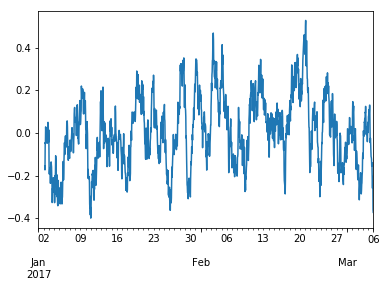

In [ ]:
dates = pd.date_range('2017-01-01', '2017-03-06', freq='H', tz='UTC')
sr = pd.Series(np.random.randn(len(dates)), index=dates)
sr.rolling(30).mean().plot()  # Give us a 30 hour rolling mean

Note that if we now change the timezone, some of the days have changed because of the time shift:

In [ ]:
# Original times
dates[:5]

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [ ]:
# New times
dates.tz_convert('US/Pacific')[:5]

DatetimeIndex(['2016-12-31 16:00:00-08:00', '2016-12-31 17:00:00-08:00',
               '2016-12-31 18:00:00-08:00', '2016-12-31 19:00:00-08:00',
               '2016-12-31 20:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

For more information about date objects in pandas, check out:

* [The pandas datetime docs](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

And this is useful for figuring out how to convert between timezones:

* [A list of time zone names](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)

# Parsing strings as a date
## ISO 8601
So how is pandas doing all of these string auto-conversions? Well, there are a few string structures that are classically defined as date-like structures. For example, the `yyyy-mm-dd` string I gave above looks fairly straightforward for a date.

What if we wanted to do something more complex with strings? For this, we use the [ISO 8601](https://www.w3.org/TR/NOTE-datetime). It takes the following form:

`YYYY-MM-DDThh:mm:ss`.

Most of these are pretty self-explanatory, but of note is the `Z` at the end. This simply says that there is zero offset for this datetime, AKA it is "UTC" time.

In [ ]:
date = pd.to_datetime('2017-03-01T12:34:02Z')
date

Timestamp('2017-03-01 12:34:02')

### Arbitrary strings
We can also tell pandas how to parse an arbitrary date string. For this, we use placeholders representing different components of the date, and then construct a "parsing string" that we give to the function. This tells the function how to turn input strings into datetime objects. For example, let's say we have this string:

In [ ]:
date_string = '02/2016/12'

This is a little tricky, because it's unclear which is the month and which is the day. By specifying a date parsing string, we can easily parse this. The placeholders that we use are in the [strftime](http://strftime.org/) website linked above. Here are some useful ones:

* `%Y` = year
* `%m` = month
* `%d` = day

In [ ]:
date = pd.to_datetime(date_string, format='%m/%Y/%d')
date

Timestamp('2016-02-12 00:00:00')

Above we told pandas to parse the date string as `{month}/{year}/{day}`. We can do this with any string structure we like:

In [ ]:
# Create a complicated date string
date_string = '02/2016/12 and the time is 11 hr 04 min and 02 sec'

# And tell `to_datetime` how to parse it
date = pd.to_datetime(date_string,
                      format='%m/%Y/%d and the time is %H hr %M min and %S sec')
date

Timestamp('2016-02-12 11:04:02')

### Printing strings
The same principle can be applied to printing strings. Any datetime object has a method called `strftime`. This lets you create a **string** from **time**. You can pass a similar date parsing string to what we used above, and it will tell the object what kind of string to create:

In [ ]:
date.strftime('%Y/%m and %d days')

'2016/02 and 12 days'

You can also use this to do some nice formatting, e.g.:

In [ ]:
date.strftime('%A, %B %d, %Y')

'Friday, February 12, 2016'

You can also pass these parsing strings to the `format` method of python strings. For example:

In [ ]:
mystring = "Today's date is...{:%A, %B %d, %Y}"
print(mystring.format(date))

Today's date is...Friday, February 12, 2016


## And that's it...sort of
In reality this is the tip of the iceberg when it comes to using datetime objects, but this should be enough to get you started. Make sure that any time you read in new data, you double check whether it is timezone encoded. If it isn't, then figure out what timezone you can assume (often it is UTC), and encoding it yourself to avoid confusion.

Datetime objects are incredibly useful, but can be a little confusing, so I hope this helps clear some things up!